In [217]:
import osmnx as ox
import heapq
import random

Load the Barcelona Map

In [218]:
place_name = "Barcelona, España"
bcn = ox.graph_from_place(place_name, network_type="walk")

Now I clean the info that I don't need from the Graph that the library loaded. As my goal is to apply Dijkstra's Algorithm, I will need to compute a weight for each edge and to know if we have already visited that node or not. To do so I will use the length between the nodes to compute the time that you spent walking through that connection. I will assume that the average person walks at 3 km/h.

In [219]:
#Prepare the weights
def prepare_graph(Graph):
    avr_speed = 3

    for edge in Graph.edges:
        Graph.edges[edge]["weights"] = Graph.edges[edge]["length"]/avr_speed
    for node in Graph.nodes:
        Graph.nodes[node]["visited"] = False
        Graph.nodes[node]["distance"] = float("inf")
        Graph.nodes[node]["previous"] = None
        #print("length: ", int((G.edges[edge]["length"]))," Weight: ", G.edges[edge]["weights"] )


Now that I have a weight assigned to each edge I can apply Dijkstra's algorithm.

In [220]:
def dijkstra(Graph, initial, final):
    prepare_graph(Graph)
    Graph.nodes[initial]["distance"] = 0
    # Main loop
    priority_queue = [(0, initial)]
    step = 0
    while priority_queue:
        _, node = heapq.heappop(priority_queue)
        # If we get to the final node
        if node == final:
            print("Iterations:", step)
            return
        Graph.nodes[node]["visited"] = True
        # Explore each neighbor node to the current one.
        for edge in Graph.out_edges(node):
            neighbor = edge[1]
            weight = Graph.edges[(edge[0], edge[1], 0)]["weights"]
            if Graph.nodes[neighbor]["distance"] > Graph.nodes[node]["distance"] + weight:
                Graph.nodes[neighbor]["distance"] = Graph.nodes[node]["distance"] + weight
                Graph.nodes[neighbor]["previous"] = node
                heapq.heappush(priority_queue, (Graph.nodes[neighbor]["distance"], neighbor))
        step += 1 
        

In [263]:
def visualize_path(Graph, initial, final):
    dijkstra(Graph, initial, final)
    path = []
    current = final
    visited_streets = []  # Set to store visited streets
    while current is not None:
        path.insert(0, current)
        current = Graph.nodes[current]["previous"]
    for i in range(len(path) - 1):
        u = path[i]
        v = path[i + 1]
        data = Graph.edges[u, v, 0]
        if 'name' in data:
            street_name = data['name']
            if street_name not in visited_streets:  # Check if street is not visited yet
                print(f"Route goes through {street_name}")
                visited_streets.append(street_name)  # Add street to visited set
    ox.plot_graph_route(
        Graph,
        path,
        edge_linewidth=0.5,  # Set the width of the edges
        node_size=0.1,  # Set node size to 0 to hide nodes (optional)
        route_color="green",
        route_linewidth=1,
        bgcolor="#ffffff"  # Set background color (optional)
    )


I also want to add a functionality in order to describe the route

Iterations: 13670
Route goes through Carrer de Virgili
Route goes through Carrer del Segre
Route goes through Carrer de Sant Adrià
Route goes through Carrer d'Otger
Route goes through ['Carrer de Sant Adrià', "Carrer d'Otger"]
Route goes through Carrer de Rubén Darío
Route goes through Carrer de Vintró
Route goes through Riera de Sant Andreu
Route goes through Avinguda Meridiana
Route goes through Carrer del Pintor Alsamora
Route goes through ["Passeig d'Andreu Nin", 'Carrer del Pintor Alsamora']
Route goes through Carrer d'Alcúdia
Route goes through Plaça dels Jardins d'Alfàbia
Route goes through Passeig de Verdum
Route goes through Carrer de Lorena


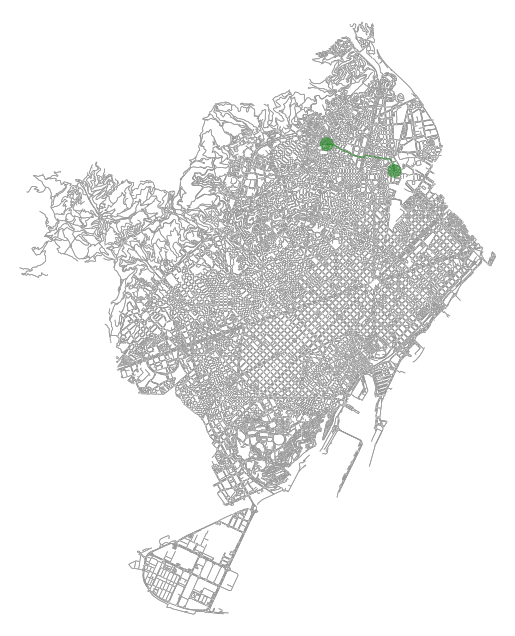

In [264]:
def find_nodes_by_street_names(G, street_name1, street_name2):
    initial_node_street1 = None
    final_node_street2 = None
    
    # Iterate over edges to find nodes by street names
    for u, v, data in G.edges(data=True):
        if 'name' in data:
            if data['name'] == street_name1 and initial_node_street1 is None:
                initial_node_street1 = u
            elif data['name'] == street_name2:
                final_node_street2 = v
    
    return initial_node_street1, final_node_street2

# Define the street names for which you want to find the initial and final nodes
street_name1 = "Carrer de Virgili"
street_name2 = "Carrer de Lorena"
initial_node_street1, final_node_street2 = find_nodes_by_street_names(bcn, street_name1, street_name2)
visualize_path(bcn, initial_node_street1, final_node_street2)